# Apple iOS app store

* The ever-changing mobile landscape is a challenging space to navigate. . The percentage of mobile over desktop is only increasing. Android holds about 53.2% of the smartphone market, while iOS is 43%. To get more people to download your app, you need to make sure they can easily find your app. Mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user.

### Problem Statement

* How does the App details contribute the user ratings.
* Try to compare apps with different cluster of price.
* Recommend the user the Apps for their area of interest.

### Content:

* "id" : User ID

* "track_name": App Name

* "size_bytes": Size (in Bytes)

* "currency": Currency Type

* "price": Price amount

* "ratingcounttot": User Rating counts (for all version)

* "ratingcountver": User Rating counts (for current version)

* "user_rating" : Average User Rating value (for all version)

* "userratingver": Average User Rating value (for current version)

* "ver" : Latest version code

* "prime_genre": Primary Genre

* "sup_devices.num": Number of supporting devices

* "ipadSc_urls.num": Number of screenshots showed for display

* "lang.num": Number of supported languages

* "vpp_lic": Vpp Device Based Licensing Enabled

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
import matplotlib.cm as cm

### Read The Data

In [3]:
df=pd.read_csv('AppleStore.csv')

df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.990000,21292,26,4.000000,4.500000,6.03.05,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.000000,161065,26,4.000000,3.500000,8.02.02,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.000000,188583,2822,3.500000,4.500000,5.00.00,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.000000,262241,649,4.000000,4.500000,5.10.00,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.000000,985920,5320,4.500000,5.000000,7.05.01,Reference,37,5,45,1


In [4]:
dfn=df.copy()

In [5]:
df.shape

(7197, 15)

## EDA

In [6]:
# checking the data types
df.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [7]:
# checking the shape
df.shape

(7197, 15)

In [8]:
# Chicking for missing value in the data
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
vpp_lic,0,0.000000,int64
lang.num,0,0.000000,int64
ipadSc_urls.num,0,0.000000,int64
sup_devices.num,0,0.000000,int64
prime_genre,0,0.000000,object
ver,0,0.000000,object
user_rating_ver,0,0.000000,float64
user_rating,0,0.000000,float64
rating_count_ver,0,0.000000,int64
rating_count_tot,0,0.000000,int64


In [9]:
# checking the varience in the data
df.std()

id                 271236755.892918
size_bytes         359206913.538703
price                      5.833006
rating_count_tot       75739.408675
rating_count_ver        3920.455183
user_rating                1.517948
user_rating_ver            1.809363
sup_devices.num            3.737715
ipadSc_urls.num            1.986005
lang.num                   7.919593
vpp_lic                    0.083066
dtype: float64

In [10]:
# # checking the duplicate value in the data
df.duplicated().sum()

0

In [11]:
freeapps = df[df.price == 0.0]
paidapps = df[df.price != 0.0]

print("Free apps : ",len(freeapps))
print("Paid apps : ",len(paidapps))

Free apps :  4056
Paid apps :  3141


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E677AC3908>],
      dtype=object)

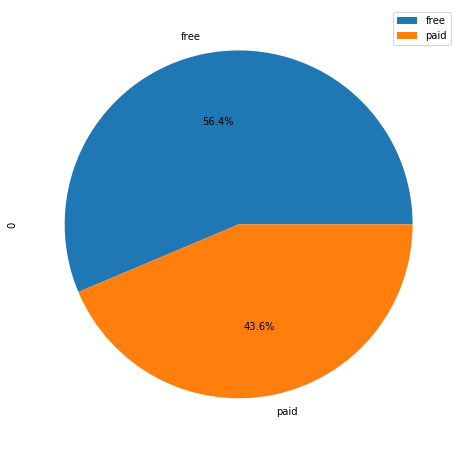

In [12]:
app_pricedf= pd.DataFrame( [len(freeapps),len(paidapps)] , index=['free','paid'])
app_pricedf.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.1f%%')

#### Interpretation

* 56.4 % of the apps are Free app in the Apple Store
* 43.6 % of the apps are paid app in the Apple Store

In [13]:
popular_apps = df.sort_values(['user_rating','rating_count_tot'], ascending=False)
popular_apps.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,487119327,Head Soccer,121319424,USD,0.000000,481564,8518,5.000000,5.000000,5.04.01,Games,40,4,11,1
302,350642635,Plants vs. Zombies,105379840,USD,0.990000,426463,680,5.000000,4.000000,1.09.13,Games,38,0,5,1
3086,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.000000,386521,10332,5.000000,5.000000,1.17.06,Games,40,5,9,1
2177,698255242,Geometry Dash Lite,69076992,USD,0.000000,370370,2650,5.000000,4.500000,2.11,Games,37,4,1,1
498,387428400,Infinity Blade,624107810,USD,0.990000,326482,177050,5.000000,5.000000,1.04.01,Games,43,5,13,1


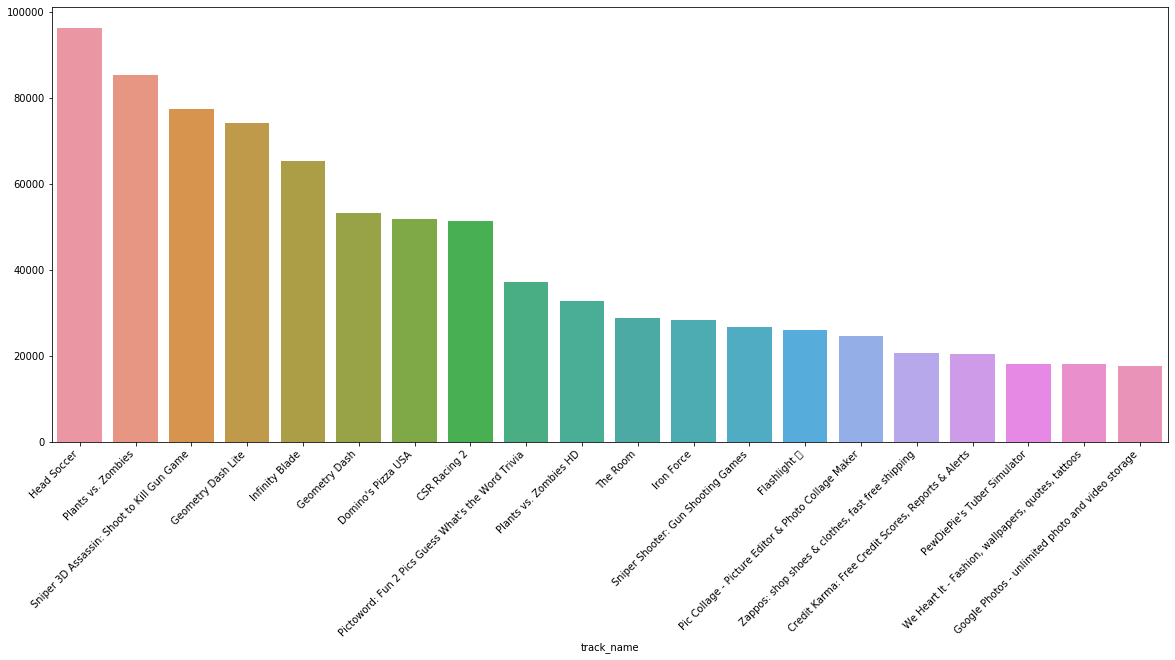

In [14]:
fig = plt.figure(figsize=(20,8))

ax = sns.barplot(popular_apps['track_name'][0:20], (popular_apps['rating_count_tot']/popular_apps['user_rating'])[0:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

#### Interpretation
##### Top 5 Popular Apps 
* Head Scoccer
* Plants vs Zombies
* Sniper 3D Assianssin
* Geometry Dash Lite
* Infinity Blade
##### As we see all these apps are Games which are prefered by the users and are most downloaded

In [15]:
cat_cols = df.select_dtypes(include='object')

num_cols = df.select_dtypes(exclude='object')


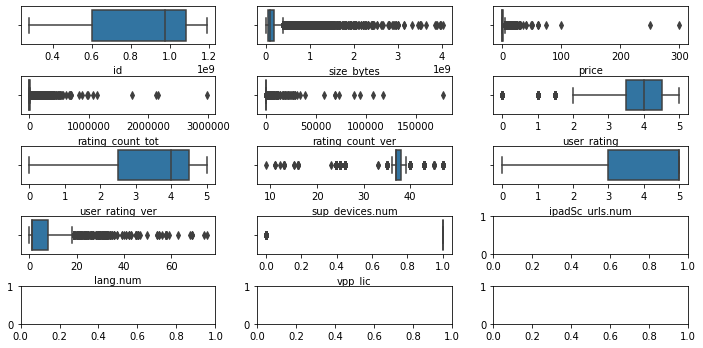

In [16]:
# Finding the outlairs
fig, ax = plt.subplots(5, 3, figsize=(10,5))
fig.tight_layout()
k=0
for col in num_cols:
    i, j = divmod(k, 3)
    sns.boxplot(x=col, data=df, ax=ax[i,j])
    k+=1

#### Interpretation

* There are some outlairs in the data .
* Not removing the outlairs as it required in the recommendation system.

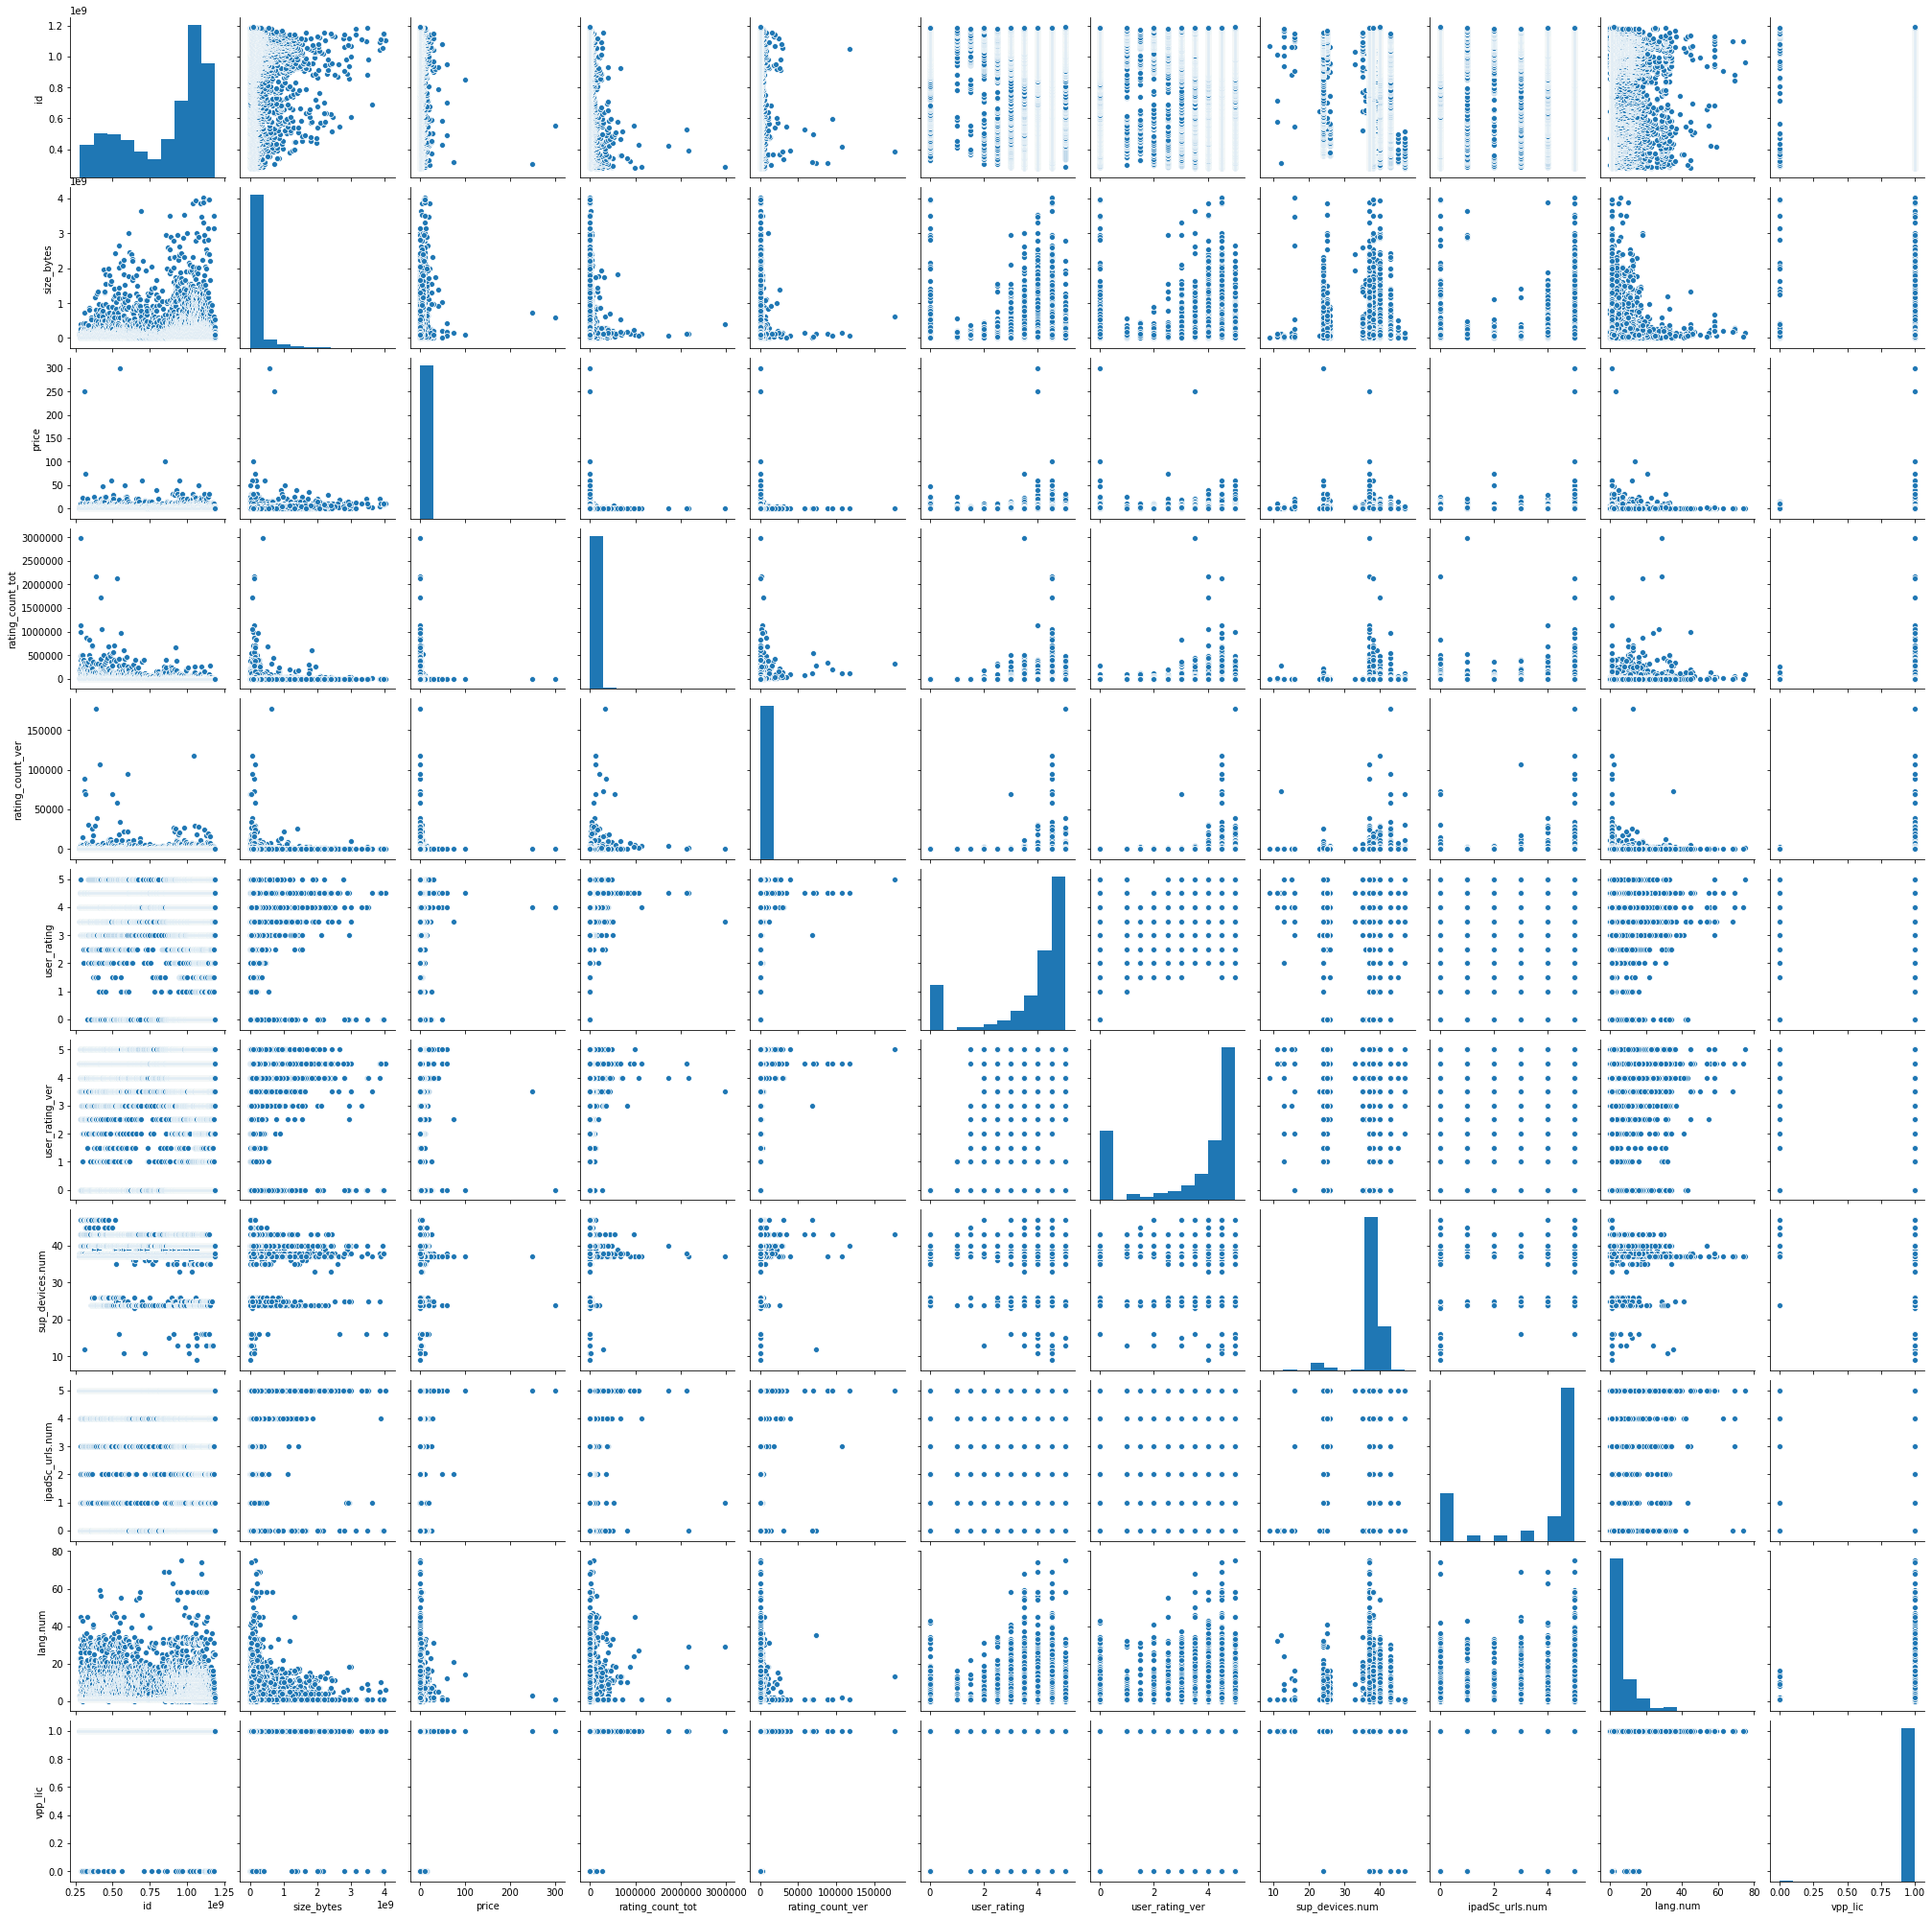

In [17]:
sns.pairplot(df)

In [18]:
dfn.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.990000,21292,26,4.000000,4.500000,6.03.05,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.000000,161065,26,4.000000,3.500000,8.02.02,Productivity,37,5,23,1


In [19]:
dfn = dfn.drop(['vpp_lic','currency','ver','sup_devices.num','ipadSc_urls.num','lang.num'],axis=1)

In [20]:
dfn.head(2)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre
0,281656475,PAC-MAN Premium,100788224,3.990000,21292,26,4.000000,4.500000,Games
1,281796108,Evernote - stay organized,158578688,0.000000,161065,26,4.000000,3.500000,Productivity


In [21]:
# separate categorical and numerical columns
cat_cols = dfn.select_dtypes(include='object')

num_cols = dfn.select_dtypes(exclude='object')

In [22]:
num_cols.drop('id',axis=1,inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler()

# normalize all the columns of the dataframe 'num_cols'
num_norm = X_norm.fit_transform(num_cols)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = num_cols.columns)

X.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver
0,0.024892,0.013300,0.007158,0.000147,0.800000,0.900000
1,0.039248,0.000000,0.054145,0.000147,0.800000,0.700000
2,0.024826,0.000000,0.063396,0.015939,0.700000,0.900000
3,0.031779,0.000000,0.088158,0.003666,0.800000,0.900000
4,0.022901,0.000000,0.331438,0.030048,0.900000,1.000000


# Clustering 

## K-Means Clustering

In [24]:
#To find the optimum number of K
wcss  = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

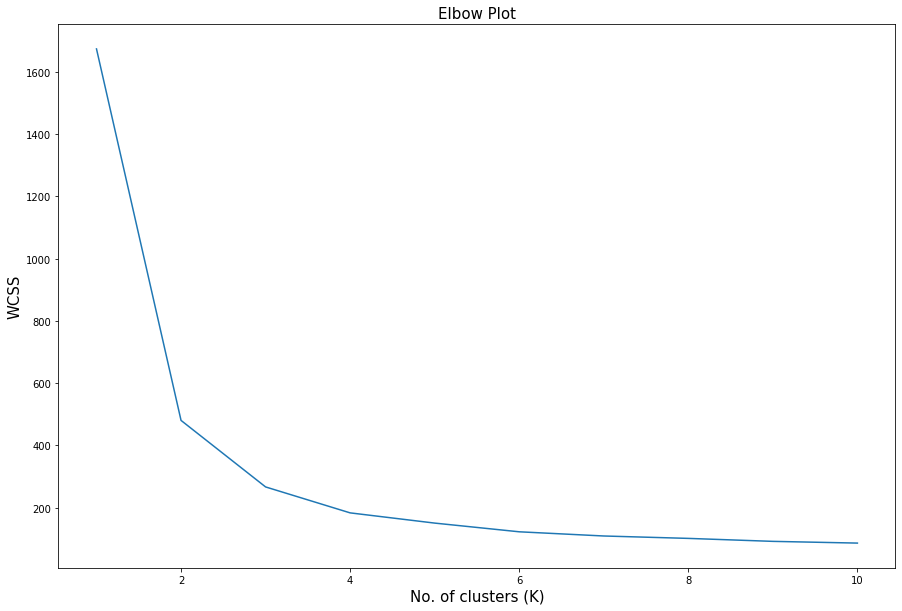

In [25]:
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
# display the plot
plt.show()

#### Interpretion

* From the above Elbow plot we can see that the line slightly deviates for k=2. i.e for two clusters.

In [26]:
#Optimal Value of K Using Silhouette Score
n_clusters = range(2,7)

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.6967745244837268)
For 3 clusters the silhouette score is 0.6796652190140617)
For 4 clusters the silhouette score is 0.5569105991767273)
For 5 clusters the silhouette score is 0.48128306619950206)
For 6 clusters the silhouette score is 0.4992788039363911)


As the score is high for 2 clusters we will consider 2 as optimum K value

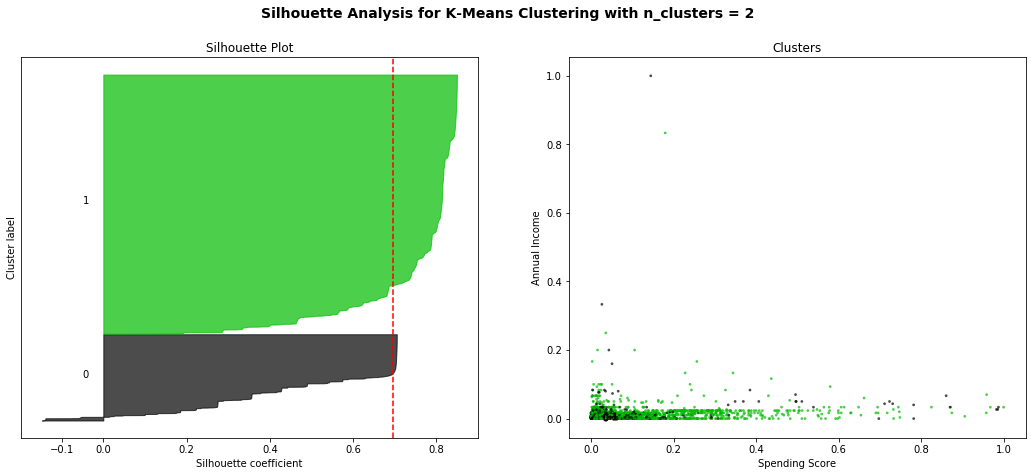

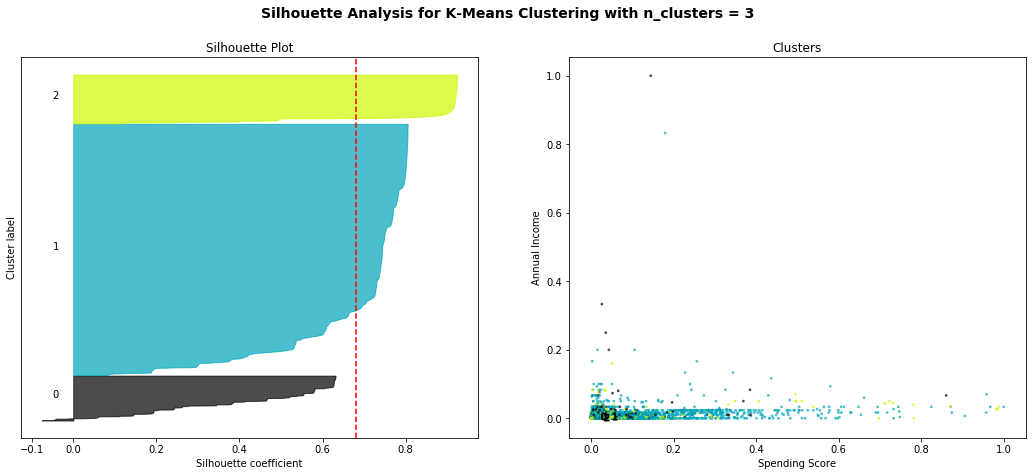

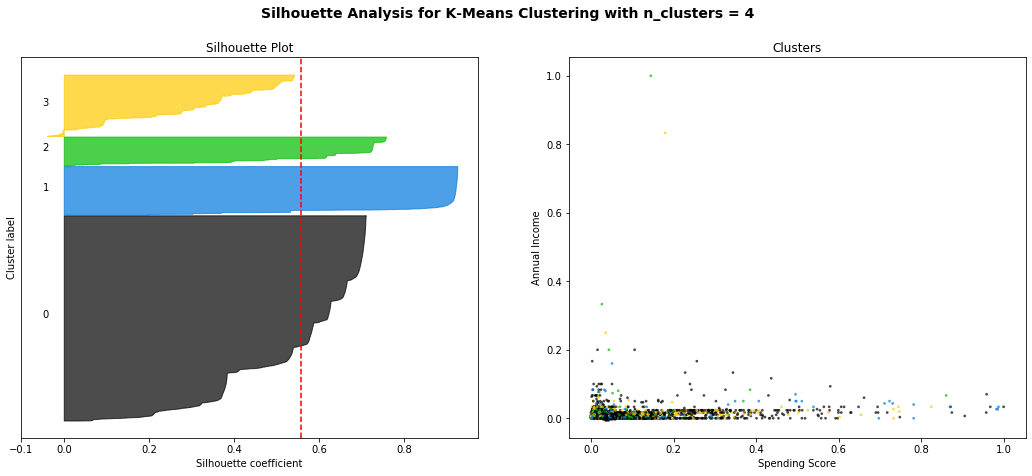

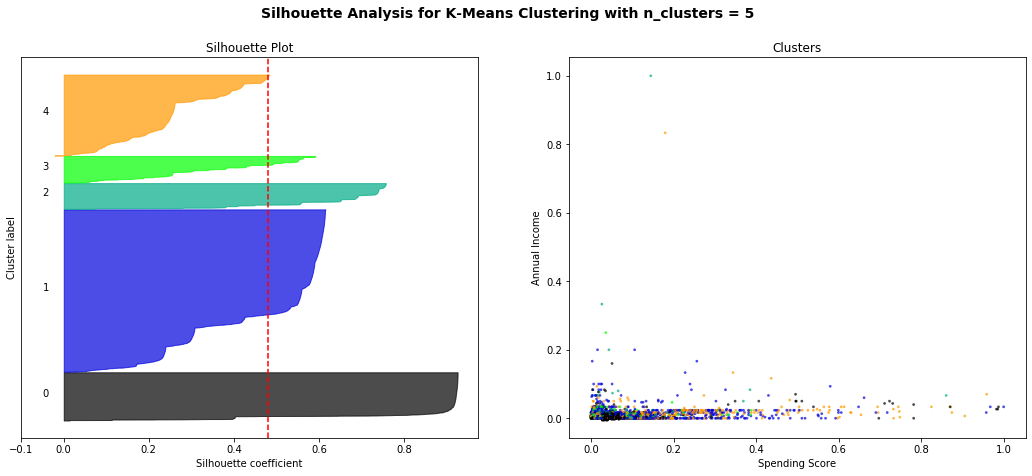

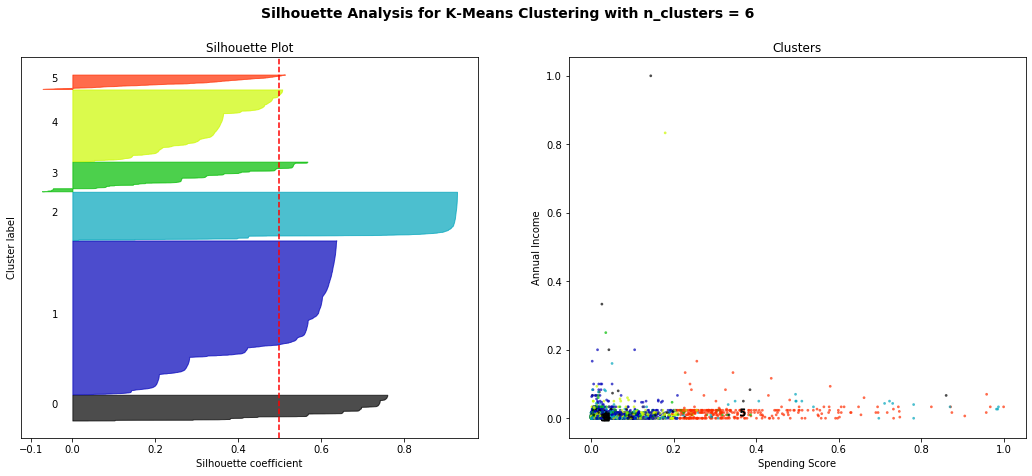

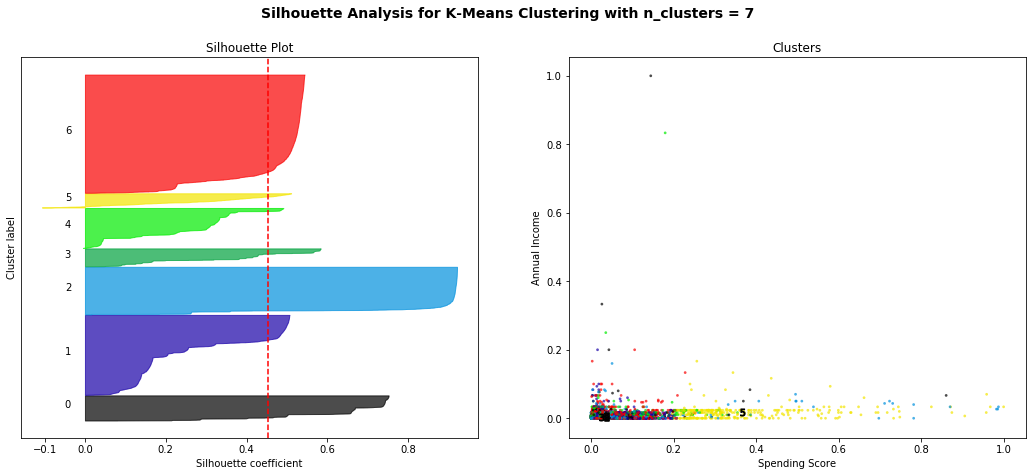

In [27]:
# consider the number of clusters
n_clusters = [2, 3, 4,5,6,7]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

# Build the Clusters

In [28]:
new_clusters = KMeans(n_clusters = 2, random_state = 10)
new_clusters.fit(X)
dfn['Cluster'] = new_clusters.labels_

In [29]:
dfn.Cluster.value_counts()

1    5399
0    1798
Name: Cluster, dtype: int64

### Cluster 1

In [30]:
len(dfn[dfn['Cluster'] == 0])

1798

In [31]:
dfn[dfn.Cluster==0].describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,Cluster
count,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,916890815.361513,134986281.957731,1.413810,1027.161846,8.602336,1.560623,0.325362,0.000000
std,255671794.929196,313958712.391611,8.092714,9371.057453,77.426665,1.790796,0.704016,0.000000
min,286070473.000000,618496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,787294763.000000,30274048.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1040065662.500000,67772928.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1098503330.500000,130130176.000000,0.990000,49.750000,0.000000,3.000000,0.000000,0.000000
max,1187779532.000000,3975609344.000000,299.990000,278166.000000,2625.000000,5.000000,3.000000,0.000000


In [32]:
dfn[dfn.Cluster==0]['prime_genre'].value_counts()

Games                690
Entertainment        179
Education            134
Utilities             81
Photo & Video         77
Lifestyle             74
Social Networking     71
Finance               66
Book                  59
Shopping              51
Sports                46
Health & Fitness      43
News                  36
Travel                32
Food & Drink          30
Productivity          27
Navigation            21
Weather               19
Reference             18
Business              16
Music                 16
Medical                7
Catalogs               5
Name: prime_genre, dtype: int64

#### interpretation
* The maximum price of the apps in this cluster is 299
* The maximum size of the apps in this cluster is 3975609344.000000
* The minimum size of the apps in this cluster is 618496.000000	
* The top 5 categories of apps are Games,Entertainment,Education,Utilities,Photo & video
* The average rating is 1.518341

### Cluster 2


In [33]:
len(dfn[dfn['Cluster'] == 1])

5399

In [34]:
dfn[dfn.Cluster==1].describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,Cluster
count,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000
mean,845227653.757918,220497375.295240,1.830257,16844.492684,610.824968,4.181793,4.228746,1.000000
std,273916016.529447,370629756.293962,4.848832,86922.059190,4516.290271,0.535999,0.626170,0.000000
min,281656475.000000,589824.000000,0.000000,1.000000,1.000000,1.500000,1.000000,1.000000
25%,582791914.500000,54789632.000000,0.000000,115.000000,11.000000,4.000000,4.000000,1.000000
50%,957471210.000000,106405888.000000,0.000000,766.000000,55.000000,4.500000,4.500000,1.000000
75%,1075860963.500000,200577536.000000,2.990000,5096.000000,226.500000,4.500000,4.500000,1.000000
max,1188375727.000000,4025969664.000000,249.990000,2974676.000000,177050.000000,5.000000,5.000000,1.000000


In [35]:
dfn[dfn.Cluster==1]['prime_genre'].value_counts()

Games                3172
Entertainment         356
Education             319
Photo & Video         272
Utilities             167
Productivity          151
Health & Fitness      137
Music                 122
Social Networking      96
Shopping               71
Lifestyle              70
Sports                 68
Book                   53
Weather                53
Travel                 49
Reference              46
Business               41
News                   39
Finance                38
Food & Drink           33
Navigation             25
Medical                16
Catalogs                5
Name: prime_genre, dtype: int64

#### interpretation
* The maximum price of the apps in this cluster is 249
* The maximum size of the apps in this cluster is 4025969664.000000	
* The minimum size of the apps in this cluster is 589824.000000
* The top 5 categories of apps are Games,Entertainment,Education,photo and video,Utilities 
* The average rating is 4.195198

### Building base models using clusters

In [36]:
cat_cols = dfn.select_dtypes(include='object')

num_cols = dfn.select_dtypes(exclude='object')

In [37]:
dfn.head(2)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,Cluster
0,281656475,PAC-MAN Premium,100788224,3.990000,21292,26,4.000000,4.500000,Games,1
1,281796108,Evernote - stay organized,158578688,0.000000,161065,26,4.000000,3.500000,Productivity,1


In [38]:
y=dfn['Cluster']
X=num_cols.drop(['Cluster','id'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<IPython.core.display.Javascript object>

In [40]:
# Chosing best accuracy from the below base models
models=list()
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())

In [41]:
for mod in models:
    print('Model name :',mod)
    clf=mod
    model=clf.fit(X_train,y_train)
    print('accuracy score ',accuracy_score(y_test,model.predict(X_test)))

Model name : LogisticRegression()
accuracy score  0.7548611111111111
Model name : KNeighborsClassifier()
accuracy score  0.7159722222222222
Model name : DecisionTreeClassifier()
accuracy score  1.0
Model name : GaussianNB()
accuracy score  0.36736111111111114


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:74.90012159110648
Test Set Accuracy:75.48611111111111

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86      1440

    accuracy                           0.75      1440
   macro avg       0.50      0.38      0.43      1440
weighted avg       1.00      0.75      0.86      1440



#### Interpretation
* Accuracy score is 0.75
* F1 score for class 0 is 0.00
* F1 score for class 1 is 0.86


# PCA

In [43]:
# separate categorical and numerical columns
cat_cols = dfn.select_dtypes(include='object')

num_cols = dfn.select_dtypes(exclude='object')

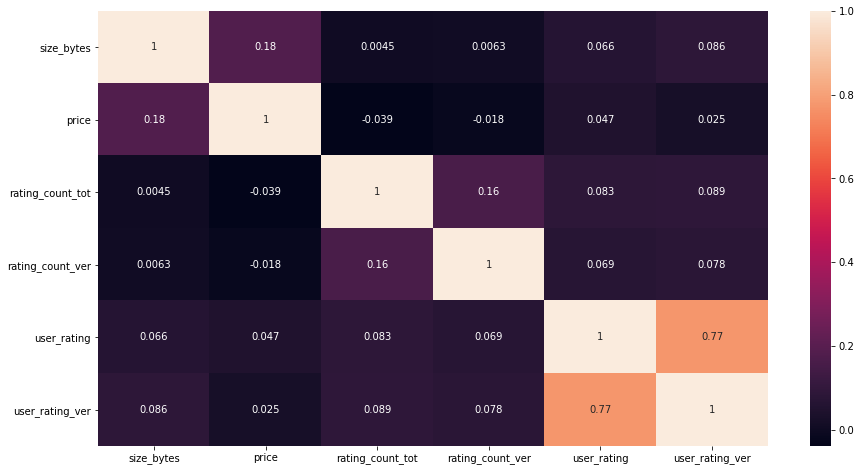

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True)

#### Interpretation

* The user ratings and user rating var are highly correlated 
* which indicates as the rating of the app depends upon the updated version of the app.

In [45]:
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.29029607e+17  3.82157663e+08  1.22055265e+11  8.92434706e+09
   3.61264130e+07  5.59429912e+07]
 [ 3.82157663e+08  3.40239565e+01 -1.72492724e+04 -4.11895478e+02
   4.12614471e-01  2.65679876e-01]
 [ 1.22055265e+11 -1.72492724e+04  5.73645803e+09  4.85914760e+07
   9.57801793e+03  1.21614220e+04]
 [ 8.92434706e+09 -4.11895478e+02  4.85914760e+07  1.53699688e+07
   4.09158972e+02  5.52160731e+02]
 [ 3.61264130e+07  4.12614471e-01  9.57801793e+03  4.09158972e+02
   2.30416490e+00  2.12618898e+00]
 [ 5.59429912e+07  2.65679876e-01  1.21614220e+04  5.52160731e+02
   2.12618898e+00  3.27379383e+00]]


In [46]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [47]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.00000000e+00  9.46500963e-07  6.11303722e-08 -2.97128650e-09
   4.74012566e-10 -6.78567795e-11]
 [-2.96178275e-09  3.07035256e-06  1.93073347e-05  9.99916842e-01
   1.16877567e-02  5.45015563e-03]
 [-9.45947780e-07 -9.99963949e-01  8.49117426e-03  2.87831749e-06
   2.40910810e-06  1.18744314e-08]
 [-6.91651113e-08 -8.49117411e-03 -9.99963948e-01  1.89086570e-05
   3.71023103e-05 -1.47112633e-06]
 [-2.79985454e-10 -1.66417304e-06 -2.17698354e-05  1.15523922e-02
  -6.23979838e-01 -7.81355043e-01]
 [-4.33567090e-10 -2.11142392e-06 -2.97828482e-05  5.73150097e-03
  -7.81353029e-01  6.24062972e-01]]

 Eigen Values 
%s [1.29029607e+17 5.73675511e+09 1.49568097e+07 3.28372101e+01
 4.87011650e+00 6.06876289e-01]


In [48]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [49]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 99.99999554  99.99999999 100.         100.         100.
 100.        ]


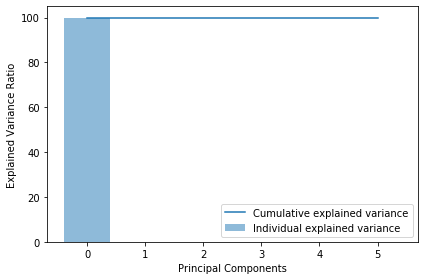

In [50]:
plt.figure(figsize=(6 , 4))
plt.bar(range(6), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(6), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Interpretation
* One principal components explain 98% of the variance in the data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<IPython.core.display.Javascript object>

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [53]:

models=list()
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())

In [54]:
for mod in models:
    print('Model name :',mod)
    clf=mod
    model=clf.fit(X_train_2,y_train)
    print('accuracy score ',accuracy_score(y_test,model.predict(X_test_2)))

Model name : LogisticRegression()
accuracy score  0.9916666666666667
Model name : KNeighborsClassifier()
accuracy score  0.9986111111111111
Model name : DecisionTreeClassifier()
accuracy score  1.0
Model name : GaussianNB()
accuracy score  0.9895833333333334


In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_2,y_train)
y_test_pred = lr.predict(X_test_2)
y_train_pred = lr.predict(X_train_2)

lr_acc=accuracy_score(y_test_pred,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:99.27045336112559
Test Set Accuracy:99.16666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       341
           1       1.00      0.99      0.99      1099

    accuracy                           0.99      1440
   macro avg       0.98      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440



#### Interpretation
* Accuracy score is 0.99
* F1 score for class 0 is 0.98
* F1 score for class 1 is 0.99


# Recommendation System

### Popularity Recommendation

In [55]:
# creating the dataframe for two columns
pd.DataFrame(dfn.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False))

,user_rating
prime_genre,
Productivity,4.005618
Music,3.978261
Photo & Video,3.800860
Business,3.745614
Health & Fitness,3.700000
Games,3.685008
Weather,3.597222
Shopping,3.540984
Reference,3.453125


In [56]:
popularity_table=dfn.groupby('prime_genre').agg({'user_rating':'mean','rating_count_tot':'count'})

In [57]:
top_popularity_table=popularity_table[popularity_table['rating_count_tot']>300]

In [58]:
top_popularity_table.sort_values('user_rating',ascending=False)

,user_rating,rating_count_tot
prime_genre,,
Photo & Video,3.800860,349
Games,3.685008,3862
Education,3.376380,453
Entertainment,3.246729,535


#### Interpretation
* Photo & Video
* Games
* Education
* Entertainment
* These are the 4 Genres  we can recommended to the new  users based on popularity.

## Content Based

In [59]:
features= ['track_name','prime_genre','user_rating','user_rating_ver','rating_count_ver','rating_count_tot']

In [60]:
df2=dfn[features]

In [61]:
df2.head()

,track_name,prime_genre,user_rating,user_rating_ver,rating_count_ver,rating_count_tot
0,PAC-MAN Premium,Games,4.000000,4.500000,26,21292
1,Evernote - stay organized,Productivity,4.000000,3.500000,26,161065
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",Weather,3.500000,4.500000,2822,188583
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",Shopping,4.000000,4.500000,649,262241
4,Bible,Reference,4.500000,5.000000,5320,985920


In [62]:
df2=df2.drop_duplicates()

In [63]:
df2.index=df2['track_name']

In [64]:
df2=df2.drop('track_name',axis=1)

In [65]:
df2.head()

,prime_genre,user_rating,user_rating_ver,rating_count_ver,rating_count_tot
track_name,,,,,
PAC-MAN Premium,Games,4.000000,4.500000,26,21292
Evernote - stay organized,Productivity,4.000000,3.500000,26,161065
"WeatherBug - Local Weather, Radar, Maps, Alerts",Weather,3.500000,4.500000,2822,188583
"eBay: Best App to Buy, Sell, Save! Online Shopping",Shopping,4.000000,4.500000,649,262241
Bible,Reference,4.500000,5.000000,5320,985920


In [66]:
data3=pd.get_dummies(df2)

In [67]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7197 entries, PAC-MAN Premium to Escape the Sweet Shop Series
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_rating                    7197 non-null   float64
 1   user_rating_ver                7197 non-null   float64
 2   rating_count_ver               7197 non-null   int64  
 3   rating_count_tot               7197 non-null   int64  
 4   prime_genre_Book               7197 non-null   uint8  
 5   prime_genre_Business           7197 non-null   uint8  
 6   prime_genre_Catalogs           7197 non-null   uint8  
 7   prime_genre_Education          7197 non-null   uint8  
 8   prime_genre_Entertainment      7197 non-null   uint8  
 9   prime_genre_Finance            7197 non-null   uint8  
 10  prime_genre_Food & Drink       7197 non-null   uint8  
 11  prime_genre_Games              7197 non-null   uint8  
 12  prime_genre_Hea

In [68]:
data3=data3.dropna()

In [69]:
from sklearn.neighbors import NearestNeighbors

In [70]:
rec_model = NearestNeighbors(metric = 'cosine')
rec_model.fit(data3)

NearestNeighbors(metric='cosine')

In [71]:
query_index=100
dist, ind = rec_model.kneighbors(data3.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

In [72]:
dist

array([[0.00000000e+00, 2.02412387e-09, 3.33977157e-09, 5.06420672e-09,
        1.07996804e-08, 1.13327657e-08]])

In [73]:
ind

array([[ 100,  679,  351, 1394,  391,   73]], dtype=int64)

In [74]:
list(df2.index[ind[0]])[1:]

['WeChat',
 'SCRABBLE Premium for iPad',
 'Google Chrome – The Fast and Secure Web Browser',
 'Fox News',
 'Mint: Personal Finance, Budget, Bills & Money']

In [75]:
for i in range(0, len(dist[0])):
    if i == 0:
        print('Top 5 Recommendations for the user who used the Apps :',df2.index[query_index])
    else:
        print(i, df2.index[ind[0][i]])

Top 5 Recommendations for the user who used the Apps : HuffPost - News, Politics & Entertainment
1 WeChat
2 SCRABBLE Premium for iPad
3 Google Chrome – The Fast and Secure Web Browser
4 Fox News
5 Mint: Personal Finance, Budget, Bills & Money


#### Interpretation
* Top 5 Recommendations for the Apps  based on content
*  WeChat
*  SCRABBLE Premium for iPad
*  Google Chrome – The Fast and Secure Web Browser
*  Fox News
*  Mint: Personal Finance, Budget, Bills & Money

## Collaborative Based Recommendation

In [76]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNWithMeans,SVDpp
from surprise import accuracy

In [77]:
reader = Reader(rating_scale=(1, 5))

In [78]:
data = Dataset.load_from_df(dfn[['id','track_name','user_rating']],reader)
data

In [79]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [80]:
user_records = trainset.ur

In [81]:
user_records[1]

[(1, 4.5)]

In [85]:
from surprise import KNNWithMeans
from surprise import accuracy

In [86]:
algo=KNNWithMeans(k=50, sim_options={'name':'pearson_baseline', 'user_based':False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [87]:
reco = algo.get_neighbors(22,10)

In [88]:
reco

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [89]:
[trainset.to_raw_iid(x) for x in reco]

['Jetpack Joyride',
 'Vampify - Turn yourself into a Vampire',
 '你我贷理财-P2P理财管家',
 'Out There Chronicles - Ep. 1',
 'PS Deals+ - Games Price Alerts for PS4, PS3, Vita',
 'ESPN Fantasy Football Baseball Basketball Hockey',
 'Hatchi - A retro virtual pet',
 'Flick Field Goal 17',
 'NOT ALONE - Story of a bird',
 '鳥として生きた男\u3000その壮絶な人生']

In [90]:
testset[0:10]

[(765224318, '7 Minute Workout Challenge HD for iPad', 4.5),
 (568543007, 'Watch NFL Network', 2.0),
 (1163706727, 'Babaji', 0.0),
 (1089058534, '【謎解き】自称カノジョからの病みすぎメッセージ', 4.0),
 (1074251093, 'Sumikko gurashi-Puzzling Ways', 0.0),
 (548946769, 'Stick Texting Emoji Emoticons Killer', 3.0),
 (1090936977, 'Catholic Emoji', 3.0),
 (390422167, 'Catan HD', 4.0),
 (1146601414, 'Bold Moves', 4.5),
 (700440156, 'Articulation Test Center Pro', 4.5)]

In [91]:
test_pred = algo.test(testset)

In [92]:
test_pred[0]

Prediction(uid=765224318, iid='7 Minute Workout Challenge HD for iPad', r_ui=4.5, est=3.528534370946822, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [93]:
test = trainset.build_anti_testset()

In [94]:
len(test)

29116815

In [95]:
pred = algo.test(test[0:10000])

In [96]:
pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in pred])

In [97]:
pred_df.columns=['id','App_name','est_rating']
pred_df

,id,App_name,est_rating
0,457446957,Vampify - Turn yourself into a Vampire,4.500000
1,457446957,你我贷理财-P2P理财管家,4.500000
2,457446957,Out There Chronicles - Ep. 1,4.500000
3,457446957,"PS Deals+ - Games Price Alerts for PS4, PS3, Vita",4.500000
4,457446957,ESPN Fantasy Football Baseball Basketball Hockey,4.500000
...,...,...,...
9995,567141387,Endless Learning Academy,4.500000
9996,567141387,土豆（短视频分享平台）,4.500000
9997,567141387,Blek,4.500000
9998,567141387,Red Onion - Tor-powered web browser for anonym...,4.500000


In [98]:
pred_df.sort_values(by=['id','est_rating'], ascending=False, inplace=True)

In [99]:
top_5 = pred_df.groupby('id').head(10).reset_index(drop=True)

In [100]:
top_5.head()

,id,App_name,est_rating
0,567141387,Jetpack Joyride,4.500000
1,567141387,你我贷理财-P2P理财管家,4.500000
2,567141387,Out There Chronicles - Ep. 1,4.500000
3,567141387,"PS Deals+ - Games Price Alerts for PS4, PS3, Vita",4.500000
4,567141387,ESPN Fantasy Football Baseball Basketball Hockey,4.500000


#### Interpretation

* From Collabaritive Recommendation system we can see that in Apps Jetpack Joyride has the highest estimated rating of 4.50
* And above 5 are the top 5 Apps with respective estimated rating

# Hybrid Recommendation System

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
trainDF, tempDF = train_test_split(dfn, test_size=0.2, random_state=100)
testDF = tempDF.copy()
tempDF.user_rating = np.nan

In [103]:
tempDF.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,Cluster
3995,1013818720,Heroki,373096448,4.990000,225,37,nan,4.500000,Games,1
2055,664783704,LEGO® The Lord of the Rings™,1497927680,4.990000,2054,2054,nan,4.500000,Games,1
2241,723795263,Trivia Crack (No Ads),247385088,2.990000,77370,2,nan,4.500000,Games,1
3537,972737732,Dash Masters,155984896,0.000000,149,14,nan,4.000000,Games,1
2392,784797900,J&J Official 7 Minute Workout,242486272,0.000000,4861,138,nan,5.000000,Health & Fitness,1


In [104]:
testDF = testDF.dropna()
testDF.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,Cluster
3995,1013818720,Heroki,373096448,4.990000,225,37,4.000000,4.500000,Games,1
2055,664783704,LEGO® The Lord of the Rings™,1497927680,4.990000,2054,2054,4.500000,4.500000,Games,1
2241,723795263,Trivia Crack (No Ads),247385088,2.990000,77370,2,4.500000,4.500000,Games,1
3537,972737732,Dash Masters,155984896,0.000000,149,14,4.000000,4.000000,Games,1
2392,784797900,J&J Official 7 Minute Workout,242486272,0.000000,4861,138,5.000000,5.000000,Health & Fitness,1


In [105]:
dff= pd.concat([trainDF, tempDF]).reset_index()

In [106]:
dff

,index,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,Cluster
0,1066,480883488,Canvas by Instructure,138883072,0.000000,19981,36,4.500000,4.500000,Education,1
1,5319,1079644135,Droppy Balls!,34074624,0.000000,791,257,4.500000,4.500000,Games,1
2,3991,1013551921,Video Smith - A Powerful video editing tool set,39056384,0.000000,1,1,5.000000,5.000000,Photo & Video,1
3,1398,536475199,Toddler Counting 123,60891136,0.990000,121,42,4.000000,4.000000,Education,1
4,423,373849969,Crash Bandicoot Nitro Kart 2,75254654,2.990000,3064,1428,3.500000,3.500000,Games,1
...,...,...,...,...,...,...,...,...,...,...,...
7192,6676,1141154420,Wire Bounce,96992256,0.000000,279,22,nan,4.500000,Games,1
7193,6485,1131935122,脳トレ爽快パズル 激ムズ！和のひとふで書き Line,36271104,0.000000,0,0,nan,0.000000,Games,0
7194,1895,632079234,Star Command,153100288,2.990000,3473,619,nan,4.000000,Games,1
7195,2069,668354926,Air Video HD - Now with multitasking and PiP s...,14665728,5.990000,3610,724,nan,4.500000,Photo & Video,1


In [107]:
dff.shape

(7197, 11)

In [108]:
A_df=dff.pivot(index = 'track_name', columns ='id', values = 'user_rating').fillna(0)
A_df

id,1000227889,1000559499,1000588300,1000590510,1000593025,1000668798,1000708019,1000773093,1000835177,1000876192,...,998834675,998936876,999183538,999195395,999239164,999263877,999273718,999535933,999702563,999771588
track_name,,,,,,,,,,,,,,,,,,,,,
! OH Fantastic Free Kick + Kick Wall Challenge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""Burn your fat with me!!""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""HOOK""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""klocki""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
( OFFTIME ) light – Track how much you use your phone & Digital Detox and unplug to focus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
２ちゃんねる for iPhone,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ＣＲスーパー海物語ＩＮ沖縄４,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=7196)
svd.fit(A_df)

TruncatedSVD(n_components=7196)

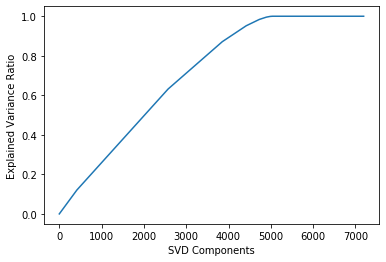

In [110]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.ylabel('Explained Variance Ratio')
plt.xlabel('SVD Components')
plt.show()

In [111]:
svd=TruncatedSVD(n_components=4950)

In [112]:
A2_df=svd.fit_transform(A_df)
A2_df.shape

(7195, 4950)

In [113]:
pcs=['SVD'+ str(i) for i in range(1,4951)]
A2_svd_df =pd.DataFrame(A2_df,index=A_df.index,columns=pcs)
A2_svd_df

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,...,SVD4941,SVD4942,SVD4943,SVD4944,SVD4945,SVD4946,SVD4947,SVD4948,SVD4949,SVD4950
track_name,,,,,,,,,,,,,,,,,,,,,
! OH Fantastic Free Kick + Kick Wall Challenge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""Burn your fat with me!!""",-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
"""HOOK""",0.331989,-0.336393,0.092924,0.216680,0.154973,0.267266,0.060488,-0.172876,-0.159710,0.376278,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
"""klocki""",-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
( OFFTIME ) light – Track how much you use your phone & Digital Detox and unplug to focus,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.100167,-0.101997,0.005216,0.014342,0.086715,0.122572,0.211531,-0.025448,0.092768,-0.389318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
２ちゃんねる for iPhone,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ＣＲスーパー海物語ＩＮ沖縄４,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [114]:
rating_corr=A2_svd_df.T.corr()
rating_corr

track_name,! OH Fantastic Free Kick + Kick Wall Challenge,"""Burn your fat with me!!""","""HOOK""","""klocki""",( OFFTIME ) light – Track how much you use your phone & Digital Detox and unplug to focus,*Solitaire*,-The 穴通し3D- 君の記憶力x反射神経を問う! ～Mr.CURVEからの挑戦状 ～,. Calculator .,1 Second Everyday: Video Diary,1+2=3,...,麻雀物語３ 役満乱舞の究極大戦,黄金日-贵金属理财投资黄金白银,龙之觉醒-热血经典RPG，回味激燃岁月,龙珠直播-高清游戏娱乐直播平台,실시간 날씨,애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!,２ちゃんねる for iPhone,ＣＲスーパー海物語ＩＮ沖縄４,Ｘ:15秒の人気 アクション ゲーム,ｗｗｗ
track_name,,,,,,,,,,,,,,,,,,,,,
! OH Fantastic Free Kick + Kick Wall Challenge,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"""Burn your fat with me!!""",nan,1.000000,-0.000429,0.000065,0.000039,0.000290,nan,nan,0.000507,nan,...,nan,nan,nan,nan,-0.000114,nan,nan,nan,nan,nan
"""HOOK""",nan,-0.000429,1.000000,0.000153,0.000090,0.000678,nan,nan,0.001184,nan,...,nan,nan,nan,nan,-0.000266,nan,nan,nan,nan,nan
"""klocki""",nan,0.000065,0.000153,1.000000,-0.000015,-0.000103,nan,nan,-0.000180,nan,...,nan,nan,nan,nan,0.000040,nan,nan,nan,nan,nan
( OFFTIME ) light – Track how much you use your phone & Digital Detox and unplug to focus,nan,0.000039,0.000090,-0.000015,1.000000,-0.000059,nan,nan,-0.000115,nan,...,nan,nan,nan,nan,0.000013,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
２ちゃんねる for iPhone,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ＣＲスーパー海物語ＩＮ沖縄４,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [115]:
rating_corr=rating_corr.fillna(0)

In [116]:
reco=rating_corr.iloc[1,:]

In [117]:
reco.sort_values(ascending=False)[1:6]

track_name
Master For Minecraft Pocket Edition - Ultimate Guide For PE   0.000634
我想有个家                                                         0.000604
Helper for Pokemon Go                                         0.000587
Psych                                                         0.000583
The Krustashians                                              0.000565
Name: "Burn your fat with me!!", dtype: float64

#### Interpretation

* These are the Top 5 Genres having maximum correlation with Burn your fat with me

## Conclusion

* These are the below recommendation Apps according to the various recommendation system
* according to Popularity based is Photos and video
* according to content based is WeChat
* according to collabarive based is Jetpack Joyride
* according to Hybrid based is Master For Minecraft Pocket


* As we can see Games and Entertainment having a major impact in both clustering and Recommendation system